# Linear Modelling Part I

In [ ]:
import pandas as pd
df=pd.read_csv('sample_test1.csv', parse_dates=['date'])

In [73]:
df.corr()

,Sec1_BidPrice,Sec1_ AskPrice,Sec2_BidPrice,Sec2_ AskPrice,Sec3_BidPrice,Sec3_ AskPrice,Sec4_BidPrice,Sec4_ AskPrice,SecP_BidPrice,SecP_ AskPrice
Sec1_BidPrice,1.000000,1.000000,0.958350,0.958341,0.550338,0.550338,0.772693,0.772714,0.957894,0.957885
Sec1_ AskPrice,1.000000,1.000000,0.958355,0.958346,0.550321,0.550320,0.772678,0.772699,0.957899,0.957890
Sec2_BidPrice,0.958350,0.958355,1.000000,1.000000,0.534536,0.534538,0.836576,0.836603,0.999342,0.999343
Sec2_ AskPrice,0.958341,0.958346,1.000000,1.000000,0.534511,0.534513,0.836557,0.836584,0.999342,0.999343
Sec3_BidPrice,0.550338,0.550321,0.534536,0.534511,1.000000,1.000000,0.382955,0.382948,0.533781,0.533757
Sec3_ AskPrice,0.550338,0.550320,0.534538,0.534513,1.000000,1.000000,0.382951,0.382944,0.533783,0.533759
Sec4_BidPrice,0.772693,0.772678,0.836576,0.836557,0.382955,0.382951,1.000000,0.999998,0.836374,0.836356
Sec4_ AskPrice,0.772714,0.772699,0.836603,0.836584,0.382948,0.382944,0.999998,1.000000,0.836401,0.836383
SecP_BidPrice,0.957894,0.957899,0.999342,0.999342,0.533781,0.533783,0.836374,0.836401,1.000000,1.000000
SecP_ AskPrice,0.957885,0.957890,0.999343,0.999343,0.533757,0.533759,0.836356,0.836383,1.000000,1.000000


In [97]:
df.set_index('date', inplace=True)
df=df.resample('D').mean()

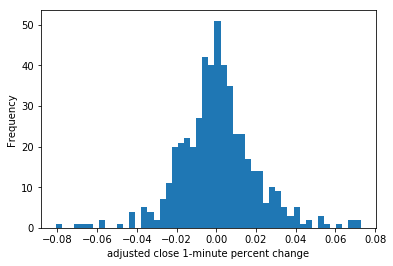

In [100]:
import matplotlib.pyplot as plt
# Histogram of the daily price change percent of Adj_Close for LNG
df['  SecP_BidPrice '].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-minute percent change')
plt.show()

If we use the same time periods for previous price changes and future price changes, we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.029669
5d_close_future_pct      0.029669             1.000000


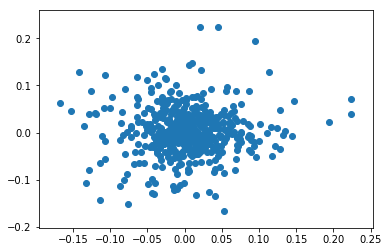

In [101]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df['5d_future_close'] = df['  SecP_BidPrice '].shift(-5)
df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)
df['5d_close_pct'] = df['  SecP_BidPrice '].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df['5d_close_pct'], df['5d_close_future_pct'])
plt.show()

We can see the 5-minute change is slightly negatively correlated to the change in the last 5 days -- which is an indication of the mean reversion!

### Creating moving average and RSI features

In [58]:
import pandas_ta as pta

In [102]:
feature_names=['5d_close_pct']
for n in [14, 30, 50, 200]:
    df['ma'+str(n)]=pd.Series(df['  SecP_BidPrice ']).rolling(window=n).mean()
    df['rsi'+str(n)]=pta.rsi(df['  SecP_BidPrice '], length = n)
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
print(feature_names)    

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [103]:
df['ma14']=df['ma14']/df['  SecP_BidPrice ']

In [104]:
df['ma30']=df['ma30']/df['  SecP_BidPrice ']
df['ma50']=df['ma50']/df['  SecP_BidPrice ']
df['ma200']=df['ma200']/df['  SecP_BidPrice ']

In [105]:
# Drop all na values
df = df.dropna()
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df[feature_names]
targets = df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000      0.110291 -0.099945  0.129603   
5d_close_pct                    0.110291      1.000000 -0.852507  0.700452   
ma14                           -0.099945     -0.852507  1.000000 -0.858333   
rsi14                           0.129603      0.700452 -0.858333  1.000000   
ma30                           -0.118815     -0.653066  0.876830 -0.910163   
rsi30                           0.102727      0.550641 -0.717246  0.940069   
ma50                           -0.104174     -0.533764  0.742702 -0.877619   
rsi50                           0.061492      0.449446 -0.602655  0.859973   
ma200                           0.034745     -0.292554  0.409861 -0.692326   
rsi200                         -0.060548      0.233256 -0.334413  0.612771   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct -0.118815  0.102727 -0.104174  0.061492  0.03474

### Check the correlations

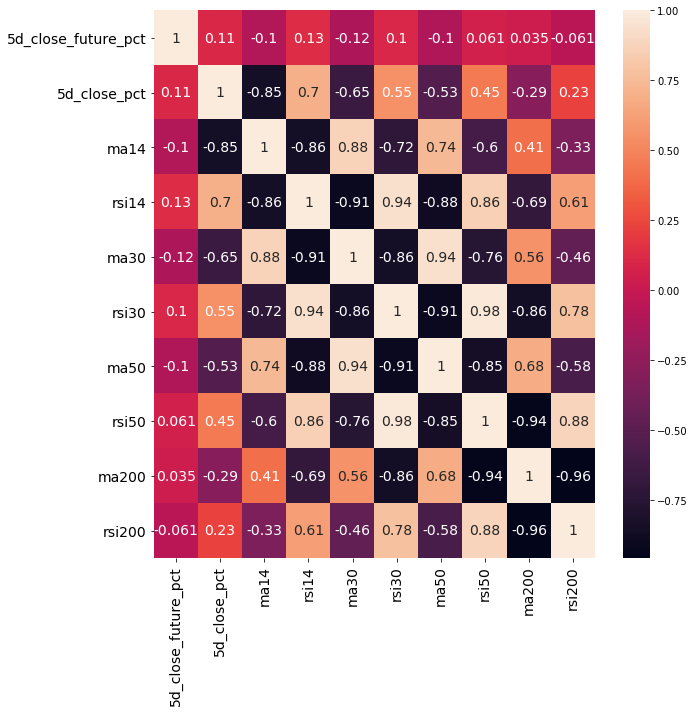

In [106]:
import seaborn as sns
# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

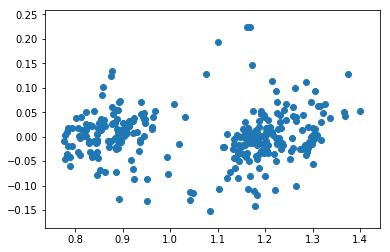

In [107]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df['ma200'], df['5d_close_future_pct'])
plt.show()

### Linear Modelling

In [109]:
features=feat_targ_df.drop(columns=['5d_close_future_pct'])
target=feat_targ_df['5d_close_future_pct']

In [110]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = target[:train_size]
test_features = linear_features[train_size:]
test_targets = target[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 10) (250, 10) (45, 10)


In [111]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.099
Method:                  Least Squares   F-statistic:                     4.042
Date:                 Mon, 07 Jun 2021   Prob (F-statistic):           7.73e-05
Time:                         21:06:31   Log-Likelihood:                 428.61
No. Observations:                  250   AIC:                            -837.2
Df Residuals:                      240   BIC:                            -802.0
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5678      0.450    

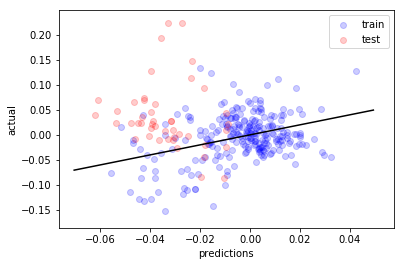

In [113]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

We can see our predictions are ok, but not very good yet. We need non-linearity!

# Linear Modelling Part II (other securities included)

### A) Sample Data 1

In [ ]:
df=pd.read_csv('sample_test1.csv', parse_dates=['date'])

In [ ]:
df.set_index('date', inplace=True)
df=df.resample('D').mean()

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df['5d_future_close'] = df['  SecP_BidPrice '].shift(-5)
df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)
df['5d_close_pct'] = df['  SecP_BidPrice '].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df['5d_close_pct'], df['5d_close_future_pct'])
plt.show()

In [ ]:
feature_names=['5d_close_pct']
for n in [14, 30, 50, 200]:
    df['ma'+str(n)]=pd.Series(df['  SecP_BidPrice ']).rolling(window=n).mean()
    df['rsi'+str(n)]=pta.rsi(df['  SecP_BidPrice '], length = n)
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
print(feature_names) 
feature_names=['  Sec1_BidPrice  ', ' Sec1_ AskPrice  ', '  Sec2_BidPrice  ',
       ' Sec2_ AskPrice  ', '  Sec3_BidPrice  ', ' Sec3_ AskPrice  ',
       '  Sec4_BidPrice ', ' Sec4_ AskPrice ',
        '5d_future_close',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200']

In [125]:
feature_names=['  Sec1_BidPrice  ', ' Sec1_ AskPrice  ', '  Sec2_BidPrice  ',
       ' Sec2_ AskPrice  ', '  Sec3_BidPrice  ', ' Sec3_ AskPrice  ',
       '  Sec4_BidPrice ', ' Sec4_ AskPrice ',
        '5d_future_close',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200']

In [126]:
# Drop all na values
df = df.dropna()
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df[feature_names]
targets = df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct    Sec1_BidPrice    \
5d_close_future_pct             1.000000          -0.126903   
  Sec1_BidPrice                -0.126903           1.000000   
 Sec1_ AskPrice                -0.126940           1.000000   
  Sec2_BidPrice                -0.149694           0.982096   
 Sec2_ AskPrice                -0.149723           0.982096   
  Sec3_BidPrice                -0.270996           0.792725   
 Sec3_ AskPrice                -0.271013           0.792729   
  Sec4_BidPrice                -0.035878           0.817533   
 Sec4_ AskPrice                -0.035987           0.817581   
5d_future_close                 0.154874           0.942628   
5d_close_pct                    0.110291           0.142870   
ma14                           -0.099945          -0.217067   
rsi14                           0.129603           0.487669   
ma30                           -0.118815          -0.322532   
rsi30                           0.102727           0.65

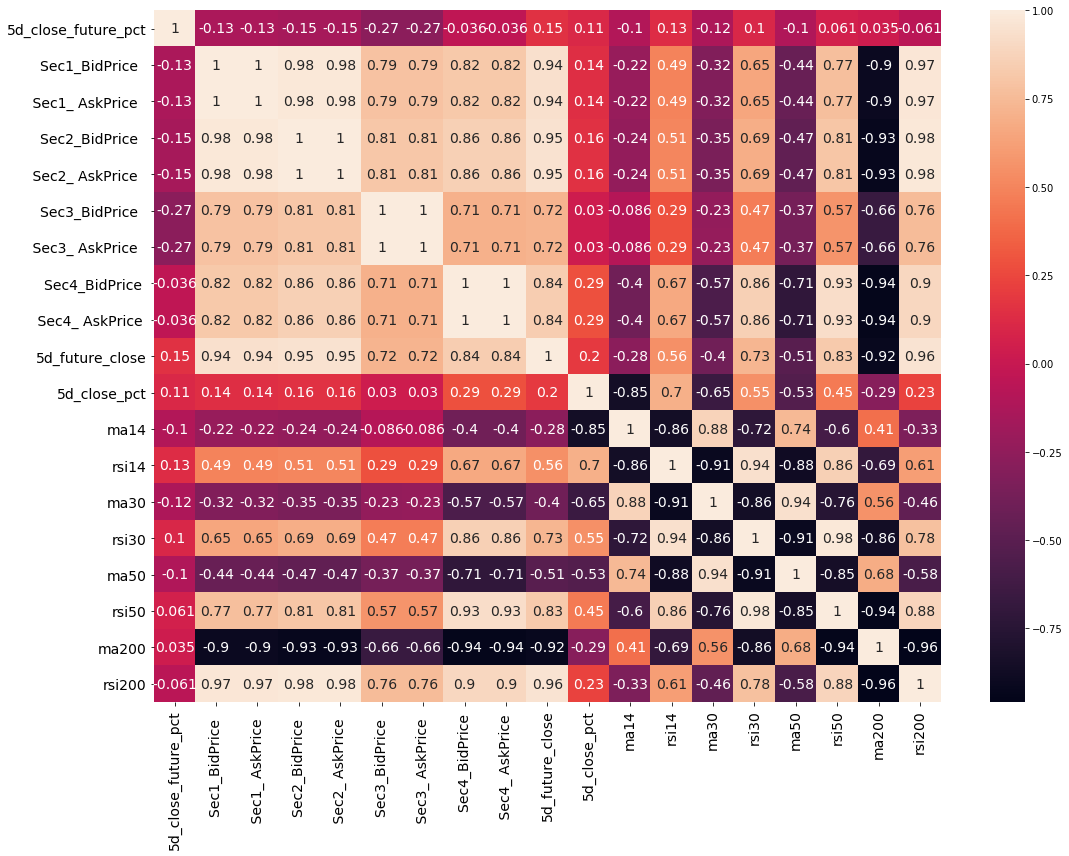

In [127]:
import seaborn as sns
# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(16,12))         # Sample figsize in inches

sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

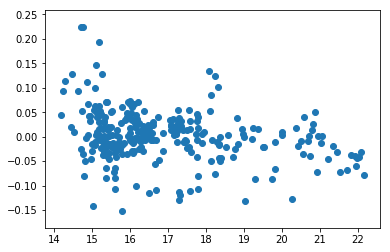

In [128]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df[' Sec3_ AskPrice  '], df['5d_close_future_pct'])
plt.show()

In [131]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = target[:train_size]
test_features = linear_features[train_size:]
test_targets = target[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 19) (250, 19) (45, 19)


In [132]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     724.1
Date:                 Mon, 07 Jun 2021   Prob (F-statistic):          6.24e-192
Time:                         21:18:02   Log-Likelihood:                 917.27
No. Observations:                  250   AIC:                            -1797.
Df Residuals:                      231   BIC:                            -1730.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3180

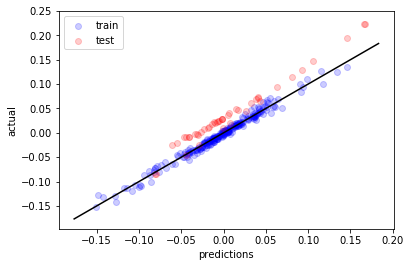

In [134]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

### b) Sample Data 2

In [165]:
df=pd.read_csv('sample_test2.csv', parse_dates=['date'])

In [166]:
df.set_index('date', inplace=True)
df=df.resample('D').mean()

In [167]:
df.dropna(inplace=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.171029
5d_close_future_pct      0.171029             1.000000


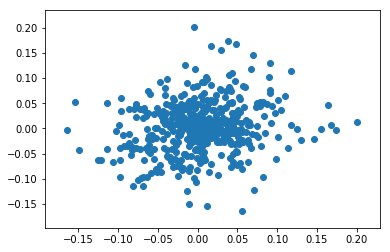

In [168]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df['5d_future_close'] = df['  SecP_BidPrice '].shift(-5)
df['5d_close_future_pct'] = df['5d_future_close'].pct_change(5)
df['5d_close_pct'] = df['  SecP_BidPrice '].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df['5d_close_pct'], df['5d_close_future_pct'])
plt.show()

In [169]:
feature_names=['5d_close_pct']
for n in [14, 30, 50, 200]:
    df['ma'+str(n)]=pd.Series(df['  SecP_BidPrice ']).rolling(window=n).mean()
    df['rsi'+str(n)]=pta.rsi(df['  SecP_BidPrice '], length = n)
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
print(feature_names) 
feature_names=['  Sec1_BidPrice  ', ' Sec1_ AskPrice  ', '  Sec2_BidPrice  ',
       ' Sec2_ AskPrice  ', '  Sec3_BidPrice  ', ' Sec3_ AskPrice  ',
       '  Sec4_BidPrice ', ' Sec4_ AskPrice ',
        '5d_future_close',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200']

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [170]:
# Drop all na values
df = df.dropna()
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = df[feature_names]
targets = df['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct    Sec1_BidPrice    \
5d_close_future_pct             1.000000          -0.088880   
  Sec1_BidPrice                -0.088880           1.000000   
 Sec1_ AskPrice                -0.088908           1.000000   
  Sec2_BidPrice                -0.111169           0.982096   
 Sec2_ AskPrice                -0.111188           0.982096   
  Sec3_BidPrice                -0.248930           0.792725   
 Sec3_ AskPrice                -0.248947           0.792729   
  Sec4_BidPrice                -0.087179           0.817533   
 Sec4_ AskPrice                -0.087274           0.817581   
5d_future_close                 0.260433           0.581591   
5d_close_pct                    0.184874           0.132305   
ma14                           -0.309404           0.577531   
rsi14                           0.135681           0.399890   
ma30                           -0.401736           0.484271   
rsi30                           0.028052           0.49

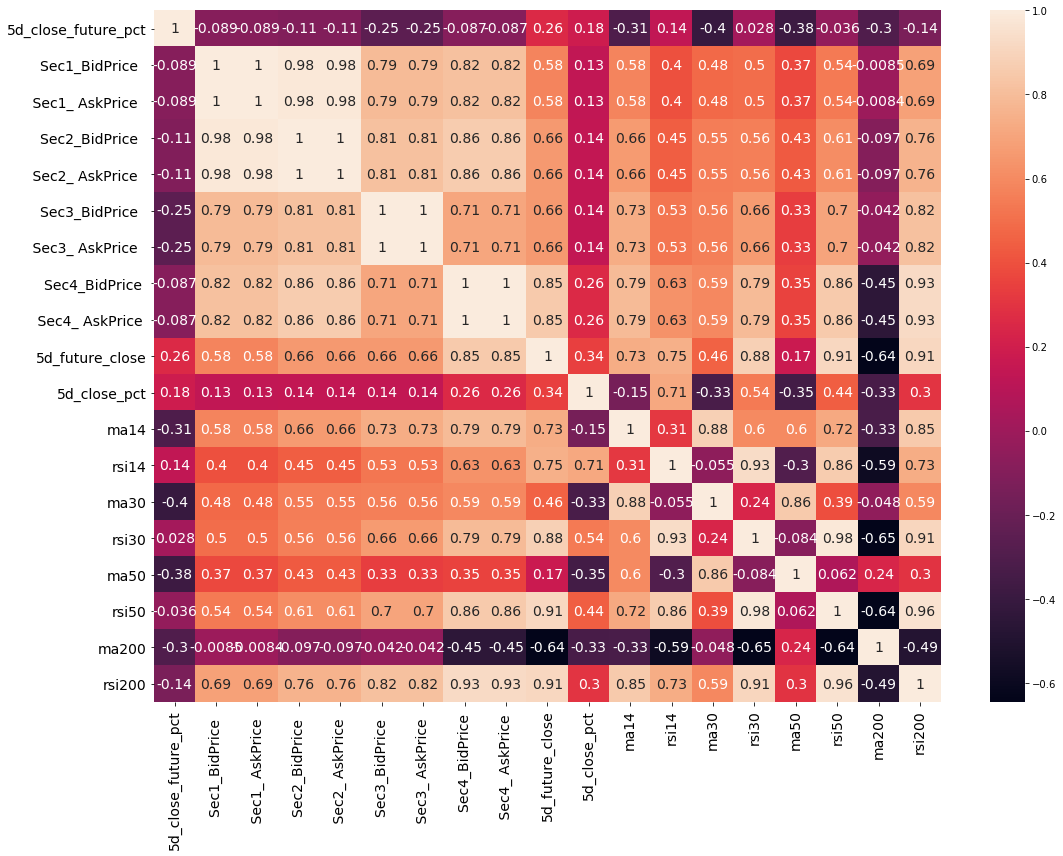

In [145]:
import seaborn as sns
# Plot heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(16,12))         # Sample figsize in inches

sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

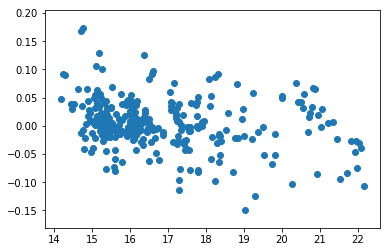

In [146]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(df[' Sec3_ AskPrice  '], df['5d_close_future_pct'])
plt.show()

In [147]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = target[:train_size]
test_features = linear_features[train_size:]
test_targets = target[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 19) (250, 19) (45, 19)


In [148]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.697
Model:                             OLS   Adj. R-squared:                  0.674
Method:                  Least Squares   F-statistic:                     29.54
Date:                 Mon, 07 Jun 2021   Prob (F-statistic):           7.52e-50
Time:                         21:28:35   Log-Likelihood:                 560.27
No. Observations:                  250   AIC:                            -1083.
Df Residuals:                      231   BIC:                            -1016.
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2736

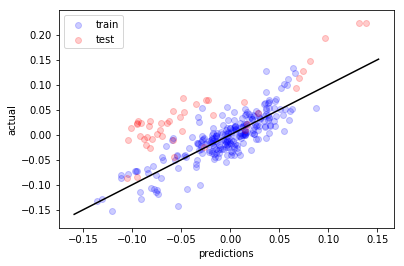

In [149]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

# Random Forest

In [171]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df.index

# Join the dataframe with the days of week DataFrame
df = pd.concat([df, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df.dropna(inplace=True)  # drop missing values in-place
print(df.head())

              Sec1_BidPrice     Sec1_ AskPrice      Sec2_BidPrice    \
date                                                                  
2019-10-23          14.243750          14.254063          10.557792   
2019-10-24          14.534958          14.545042          10.768000   
2019-10-25          14.295875          14.305979          10.559542   
2019-10-28          14.262667          14.272688          10.487187   
2019-10-30          13.995000          14.005333          10.287146   

             Sec2_ AskPrice      Sec3_BidPrice     Sec3_ AskPrice    \
date                                                                  
2019-10-23          10.567896          16.325563          16.335583   
2019-10-24          10.778125          16.744688          16.754812   
2019-10-25          10.569563          16.531937          16.541958   
2019-10-28          10.497229          16.433687          16.443750   
2019-10-30          10.297250          16.123250          16.133271   

    

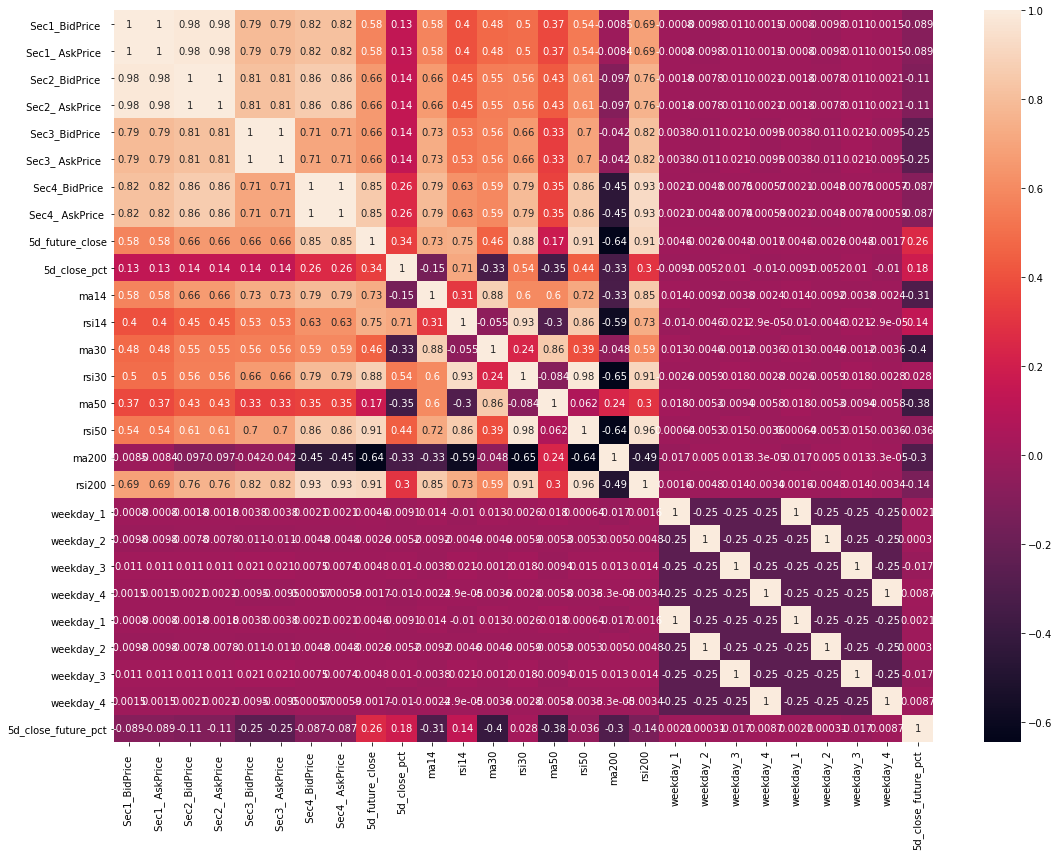

In [172]:
fig, ax = plt.subplots(figsize=(16,12))
# Add the weekday labels to the new_features list
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])

# Plot the correlations between the new features and the targets
sns.heatmap(df[feature_names + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [176]:
features = df[feature_names]
targets = df['5d_close_future_pct']

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=1)


In [178]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(X_train, y_train)

# Check the score on train and test
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test, y_test))

1.0
0.4434512435032131


A perfect fit on the training data...

### Hyperparameter Tuning

In [184]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(X_train, y_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(X_train, y_train))
    print(decision_tree.score(X_test, y_test), '\n')

max_depth= 3
0.6287778486242834
0.046886010630325936 

max_depth= 5
0.8578484981198636
0.32590850752841694 

max_depth= 10
0.9938078919410689
0.6925560079582989 



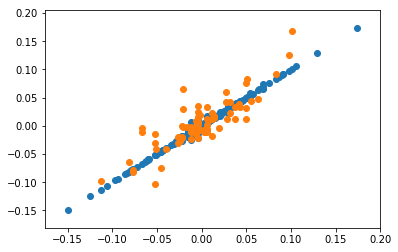

In [195]:
# Use the best max_depth of 10 from last code to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

# Predict values for train and test
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, y_train, label='train')
plt.scatter(test_predictions, y_test, label='test')
plt.show()